## Análisis de Información Recopilada - Clase Espejo Logro Académico

### Paso 1: Cargue de librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

##Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

##Librerías de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

### Cargue de la data

In [2]:
datos = pd.read_csv('./datosFinalesL.csv', sep=';', encoding='latin1')
datos.head()
datos.shape

(103, 26)

### Paso 2: Pre procesamiento de la data

In [3]:
##Renombrar las columnas
datos.columns = ['DemoEstrato','DemoEdad','DemoGenero','DemoSemestre','DemoPadres','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo','Pedag1','Pedag2','Pedag3','Pedag4','Pedag5','Pedag6','Pedag7','Pedag8','Pedag9','Pedag10','Pedag11','Pedag12','Pedag13','Pedag14','Pedag15','Pedag16','LogroAca']
datos.head()

data = datos.drop(['LogroAca'],axis=1)

In [4]:
##Demográficos
round(datos.DemoEstrato.value_counts()/np.float64(len(datos)),2)*100

##El 63% de la población es de estrato 2, 21% estrato 1 y el restante 16% estrato 3,4 y 5

DemoEstrato
2    63.0
1    21.0
3    10.0
4     4.0
5     2.0
Name: count, dtype: float64

In [5]:
round(datos.DemoEdad.value_counts()/np.float64(len(datos)),2)*100
#El 63% de la población se encuentran en el rango de edad 21 a 25 años
#El 21% entre 17 -20 años y el restante 16% son mayores de 25 años.

DemoEdad
2    63.0
1    21.0
3    16.0
Name: count, dtype: float64

In [6]:
round(datos.DemoGenero.value_counts()/np.float64(len(datos)),2)*100
#El 65% de los encuestados son hombres y el 35% son mujeres

DemoGenero
1    65.0
2    35.0
Name: count, dtype: float64

In [7]:
round(datos.DemoSemestre.value_counts()/np.float64(len(datos)),2)*100
#El 45% de las personas encuestadas pertenecen a decimo semestre, el 21% al noveno semestre, el 18% a septimo semestre y el 16% final a quinto semestre.

DemoSemestre
10    45.0
9     21.0
7     18.0
5     16.0
Name: count, dtype: float64

In [8]:
pd.crosstab(datos.DemoGenero, datos.DemoPadres, margins=True, margins_name="Total")
  #37 estudiantes del género masculino no viven con sus padres actualmente, 30 estudiantes del género masculino si conviven con sus padres
  #En el caso de las mujeres la relación es 17 no viven con sus padres y 19 si lo hacen actualmente.

DemoPadres,0,1,Total
DemoGenero,,,
1,37,30,67
2,17,19,36
Total,54,49,103


In [9]:
pd.crosstab(datos.DemoEstrato, datos.DemoPadres, margins=True, margins_name="Total")
#54 estudiantes de estratos 1 y 2 es donde se encuentran el mayor número que no vive con los padres.

DemoPadres,0,1,Total
DemoEstrato,,,
1,14,8,22
2,34,31,65
3,5,5,10
4,1,3,4
5,0,2,2
Total,54,49,103


In [10]:
pd.crosstab(datos.DemoEstrato, datos.DemoLaborando, margins=True, margins_name="Total")
#68 personas de los estratos 1,2,3,4 y5 no se encuentran laborando actualmente. 
# Los estratos 1 y 2 son los que mayor cantidad poblacional tienen en esa situacion

DemoLaborando,0,1,Total
DemoEstrato,,,
1,15,7,22
2,40,25,65
3,9,1,10
4,3,1,4
5,1,1,2
Total,68,35,103


In [11]:
pd.crosstab(datos.DemoGenero, datos.DemoEsMental, margins=True, margins_name="Total")
#41 hombres aducen que su trabajo no implica esfuerzo mental de igual manera 27 mujeres confirman la misma tendencia.

DemoEsMental,0,2,3,4,5,Total
DemoGenero,,,,,,
1,41,1,9,8,8,67
2,27,1,6,2,0,36
Total,68,2,15,10,8,103


### Paso 3: Gráficas mas Relevantes

In [12]:
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
def drawChart(dim, column1, column2, texto1, texto2, explod, preguntaC, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.05, fontsize=18, weight='bold')
    
    ##Grafica Matplotlib
    datos[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(['4 Siempre', '3 Casi siempre', '2 Algunas Veces','1 Casi Nunca', '0 Nunca'],loc=2, fontsize=10)
    
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(x= column1, data=datos,hue=column2,  ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    
    plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'], fontsize=10)
    plt.show() 

def drawChart2(dim, column1, column2, texto2, question, sizes):
  f, ax = plt.subplots(figsize=(sizes[0],sizes[1]))
  f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, question), x= 0.5, y =1.05, fontsize=18, weight='bold')

  plot = sns.countplot(x= column2, data=datos,hue=column1, palette=colors)
  for i in plot.patches:
      plot.annotate(i.get_height(),
                    (i.get_x() + i.get_width()/2, i.get_height()),
                    ha='center', va='baseline', fontsize=12, 
                    color='black', xytext=(0,1),
                    textcoords='offset points')
  ax.set_title(texto2,fontsize=14)
  ax.set_xlabel('', fontsize=12)
  ax.set_ylabel('', fontsize=12)
  ax.tick_params(labelsize=14)
  
  plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'],fontsize=10)
  plt.show() 


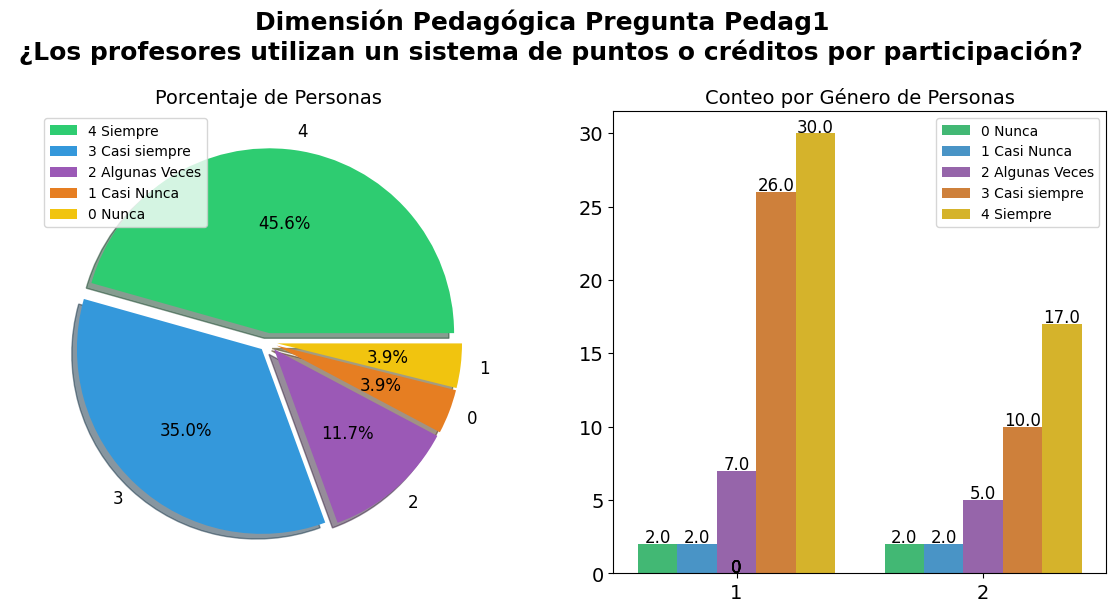

In [13]:
drawChart('Pedagógica','DemoGenero','Pedag1', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05, 0.05, 0.05,0.05), 
          '¿Los profesores utilizan un sistema de puntos o créditos por participación?', sizes=[14,6])
#0 Nunca 
#1 Casi nunca 
#2 Algunas veces  
#3 Casi siempre 
#4 Siempre 
#el 45,6% de los encuestados aducen que los docentes si utilizan un sistema de puntos o créditos por participación en la clase espejo.
#Un 8% aduce que nunca se utiliza dicho sistema.

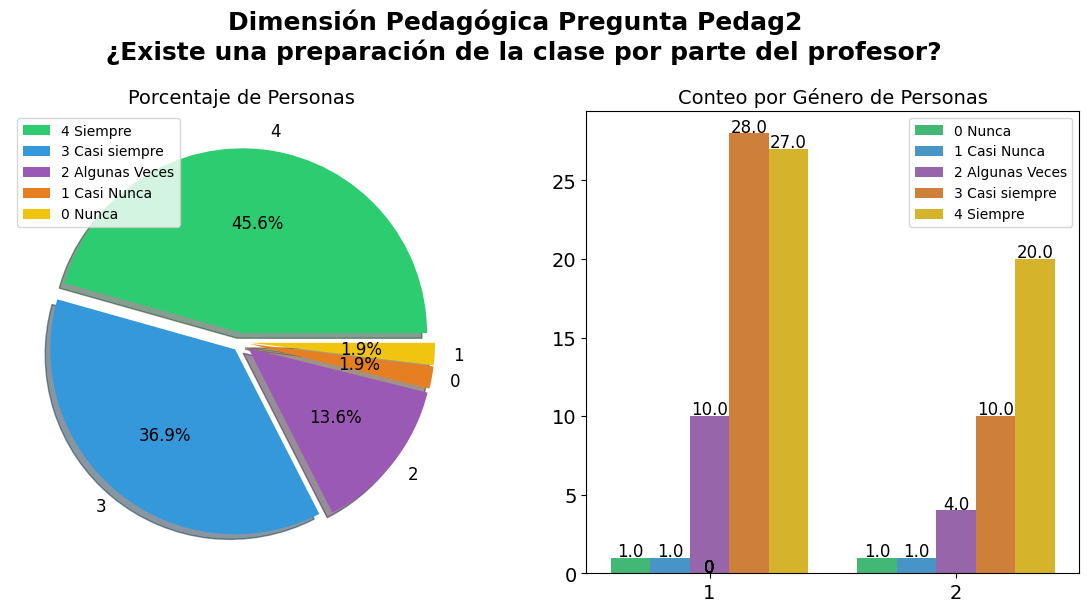

In [14]:
drawChart('Pedagógica','DemoGenero','Pedag2', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Existe una preparación de la clase por parte del profesor?', sizes=[14,6])
          #el 45,6% de los encuestados aducen que los docentes casi siempre preparan la clase espejo a impartir. Un 4% reconoce que no existe preparación 
          #para dicho encuentro.

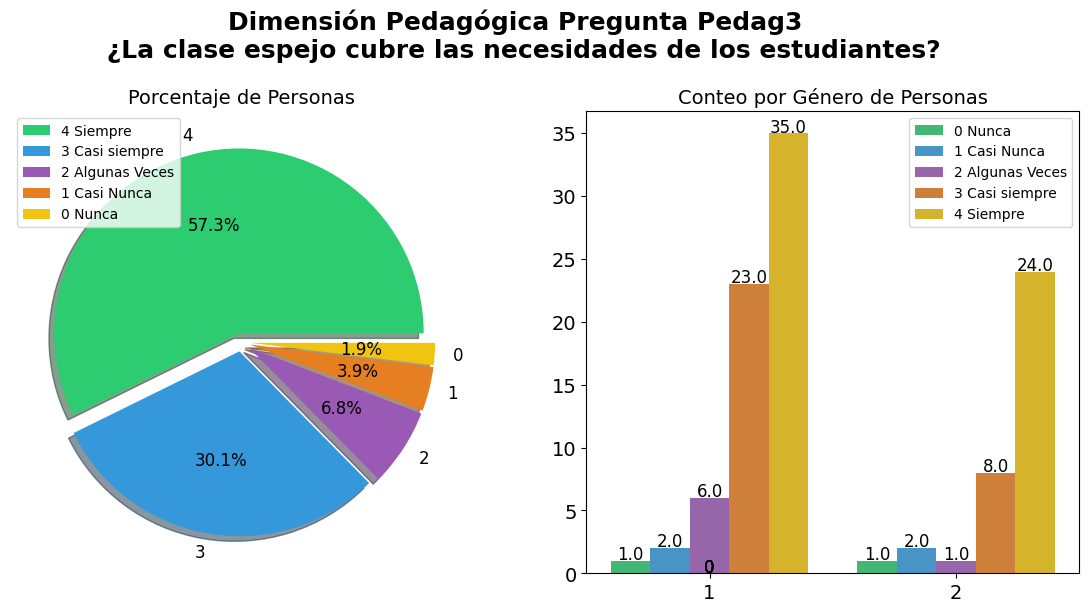

In [15]:
drawChart('Pedagógica','DemoGenero','Pedag3', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La clase espejo cubre las necesidades de los estudiantes?', sizes=[14,6])
          #El 57.3% de las personas aducen que casi siempre se cubre con las necesidades de los estudiantes en la clase espejo.

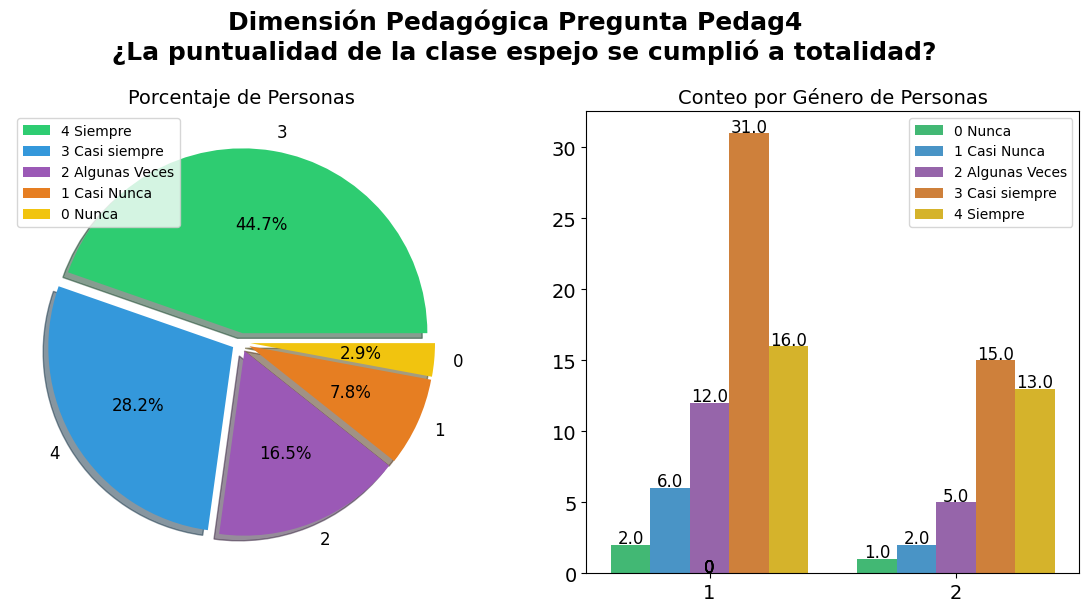

In [16]:
drawChart('Pedagógica','DemoGenero','Pedag4', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La puntualidad de la clase espejo se cumplió a totalidad?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que casi siempre se cumple con el horario de la clase espejo. Un 11% aduce que no se cumple con los horarios
#pactados

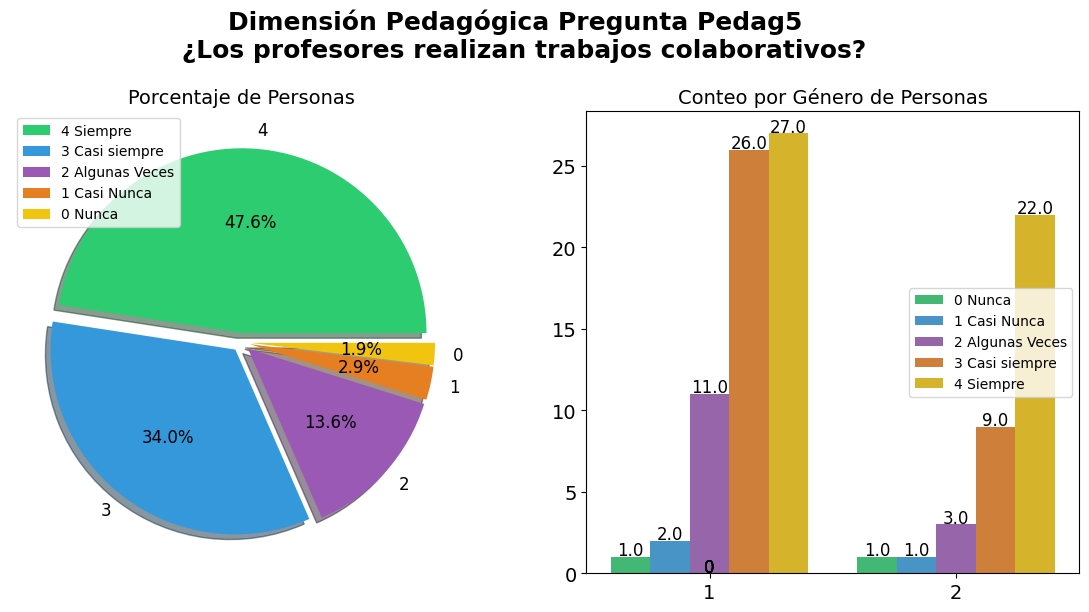

In [17]:
drawChart('Pedagógica','DemoGenero','Pedag5', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores realizan trabajos colaborativos?', sizes=[14,6])
#Algunas veces los profesores realizan trabajos colaborativos durante la clase espejo con un 13,6% de los estudiantes lo afirman

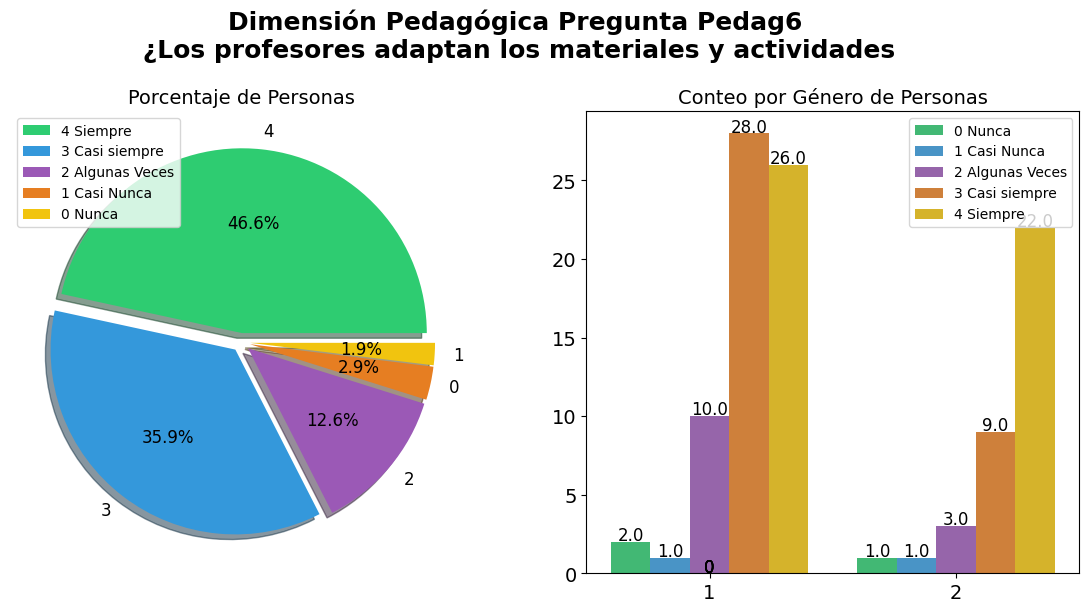

In [18]:
drawChart('Pedagógica','DemoGenero','Pedag6', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores adaptan los materiales y actividades ', sizes=[14,6])
# 

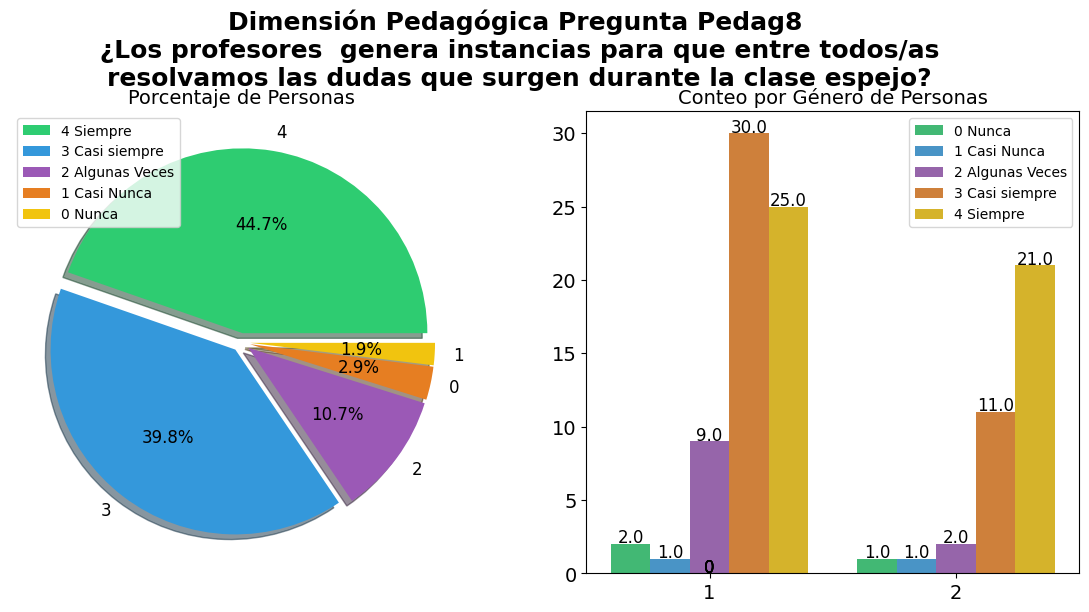

In [19]:
drawChart('Pedagógica','DemoGenero','Pedag8', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  genera instancias para que entre todos/as \nresolvamos las dudas que surgen durante la clase espejo?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que siempre los profesores generan espacios para aclarar dudas.

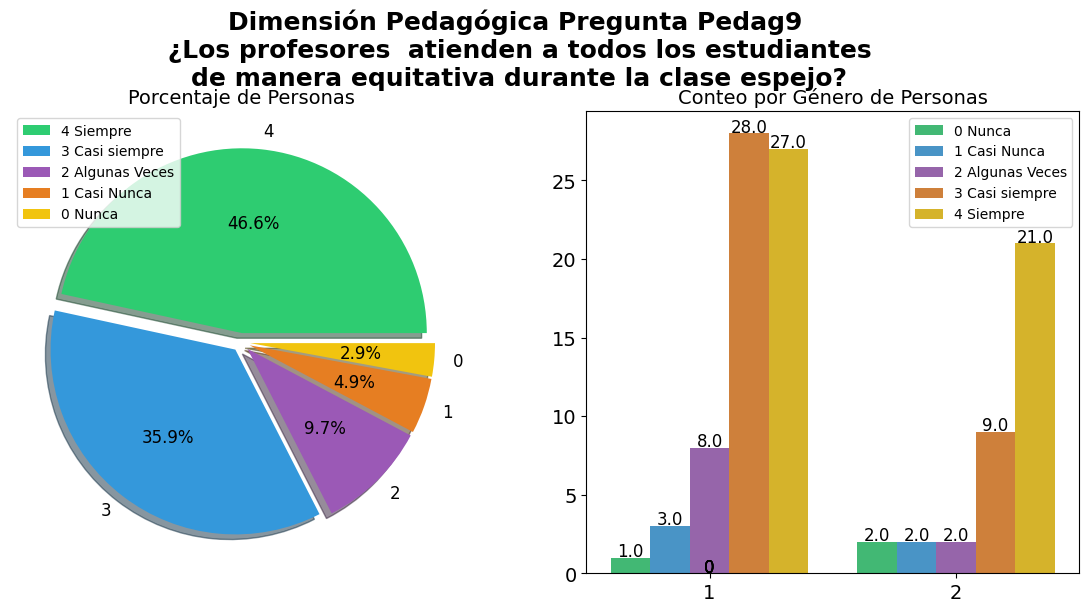

In [20]:
drawChart('Pedagógica','DemoGenero','Pedag9', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  atienden a todos los estudiantes \nde manera equitativa durante la clase espejo?', sizes=[14,6])
          #9,7% de los estudiantes evidencian que no son atendidas sus dudas en las clases espejo.

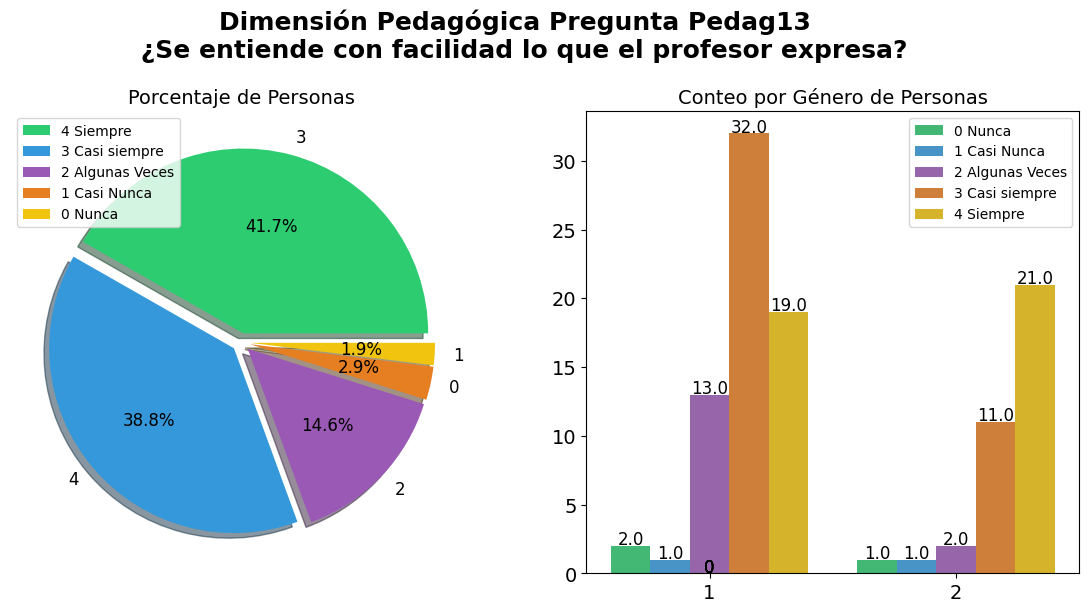

In [21]:
drawChart('Pedagógica','DemoGenero','Pedag13', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Se entiende con facilidad lo que el profesor expresa?', sizes=[14,6])
    #41,7% aducen que casi siempre se entiende lo que el profesor expresa.un 18% reconoce que no se entiende lo explicado por el docente.

In [22]:
datos['LogroAca'].value_counts()

LogroAca
Se cumple Aceptable     70
Se cumple Alto Grado    26
Se cumple Bajo Grado     7
Name: count, dtype: int64

### Paso 4: Normalización, Test de Normalidad, Correlación de Pearson y Alpha de Cronbach

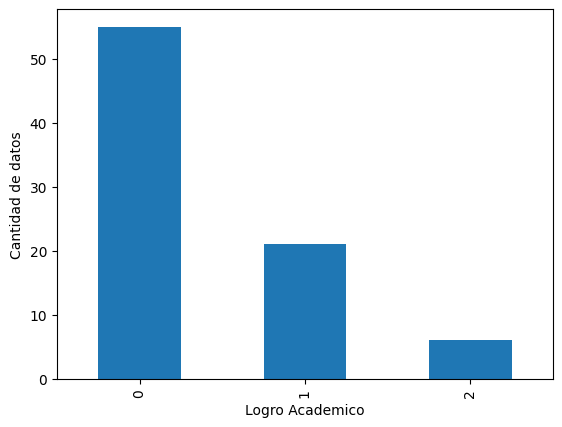

In [23]:

#!pip install scikit-plot
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datos['LogroAca']= label_encoder.fit_transform(datos['LogroAca']) 

## Balance de carga de variables
features = []
for feature in datos.columns:
    if feature != 'LogroAca':
        features.append(feature)
X = datos[features]
y = datos['LogroAca']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Academico')
plt.show()

## Gráficas de evaluación de los Modelos

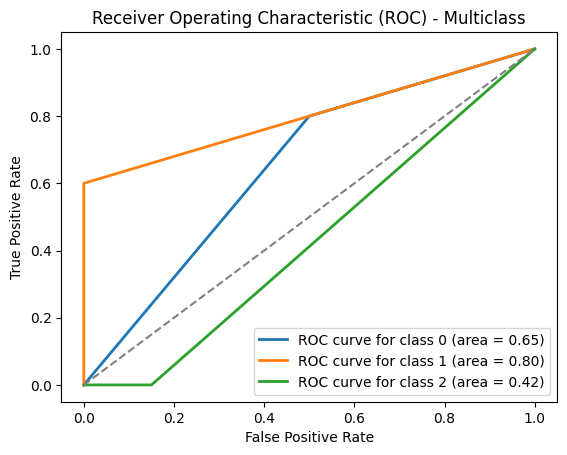

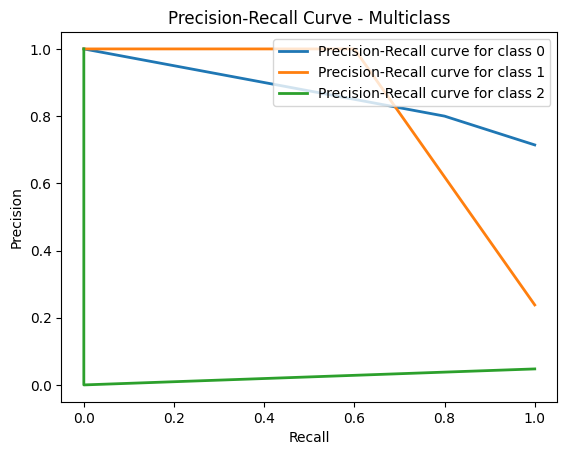

In [25]:
#!pip install scikit-plot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.preprocessing import label_binarize
import numpy as np

# Binariza las etiquetas
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Entrena el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

# Graficar curva ROC y Precision-Recall para cada clase
for i in range(n_classes):
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Graficar curva Precision-Recall para cada clase
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc="upper right")
plt.show()

#### Normalizar datos

In [26]:
datosVie = data
dataLista = X_train

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_train_norm = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [27]:
datosVie = data
dataLista = X_test

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_test_norm = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [28]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(X_train_norm)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,4.649460e-10,No es una variable Normal
1,DemoEdad,9.369040e-10,No es una variable Normal
2,DemoGenero,1.953850e-13,No es una variable Normal
3,DemoSemestre,8.845150e-11,No es una variable Normal
4,DemoPadres,6.039683e-13,No es una variable Normal
5,DemoLaborando,7.395135e-14,No es una variable Normal
6,DemoEsMental,1.144463e-12,No es una variable Normal
7,DemoEsFisico,1.386377e-12,No es una variable Normal
8,DemoTrabajo,6.105794e-13,No es una variable Normal
9,Pedag1,5.481585e-10,No es una variable Normal


In [29]:
iterarCol(X_test_norm)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,4.649460e-10,No es una variable Normal
1,DemoEdad,9.369040e-10,No es una variable Normal
2,DemoGenero,1.953850e-13,No es una variable Normal
3,DemoSemestre,8.845150e-11,No es una variable Normal
4,DemoPadres,6.039683e-13,No es una variable Normal
5,DemoLaborando,7.395135e-14,No es una variable Normal
6,DemoEsMental,1.144463e-12,No es una variable Normal
7,DemoEsFisico,1.386377e-12,No es una variable Normal
8,DemoTrabajo,6.105794e-13,No es una variable Normal
9,Pedag1,5.481585e-10,No es una variable Normal


In [30]:
corr_matrix = X_train_norm.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
155,DemoEsMental,DemoLaborando,0.963215,0.963215
131,DemoLaborando,DemoEsMental,0.963215,0.963215
133,DemoLaborando,DemoTrabajo,0.957160,0.957160
205,DemoTrabajo,DemoLaborando,0.957160,0.957160
158,DemoEsMental,DemoTrabajo,0.949224,0.949224
206,DemoTrabajo,DemoEsMental,0.949224,0.949224
132,DemoLaborando,DemoEsFisico,0.946743,0.946743
180,DemoEsFisico,DemoLaborando,0.946743,0.946743
181,DemoEsFisico,DemoEsMental,0.903893,0.903893
157,DemoEsMental,DemoEsFisico,0.903893,0.903893


Text(0.5, 1.0, 'Mapa de Correlación')

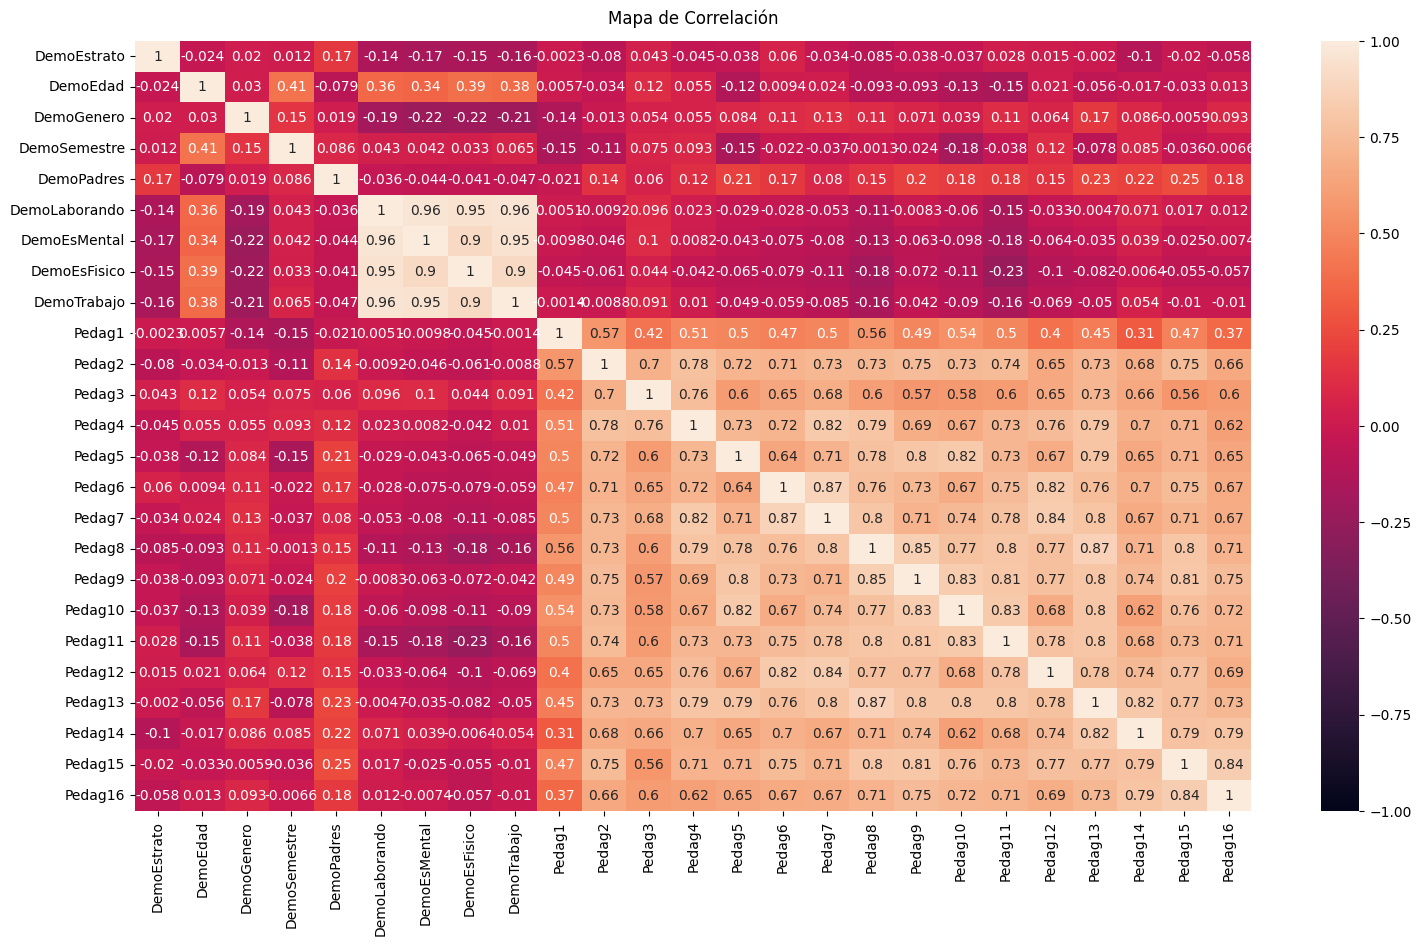

In [31]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [32]:
corr_matrix = X_test_norm.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
155,DemoEsMental,DemoLaborando,0.951303,0.951303
131,DemoLaborando,DemoEsMental,0.951303,0.951303
393,Pedag7,Pedag10,0.915565,0.915565
465,Pedag10,Pedag7,0.915565,0.915565
132,DemoLaborando,DemoEsFisico,0.906827,0.906827
180,DemoEsFisico,DemoLaborando,0.906827,0.906827
205,DemoTrabajo,DemoLaborando,0.905822,0.905822
133,DemoLaborando,DemoTrabajo,0.905822,0.905822
157,DemoEsMental,DemoEsFisico,0.879441,0.879441
181,DemoEsFisico,DemoEsMental,0.879441,0.879441


Text(0.5, 1.0, 'Mapa de Correlación')

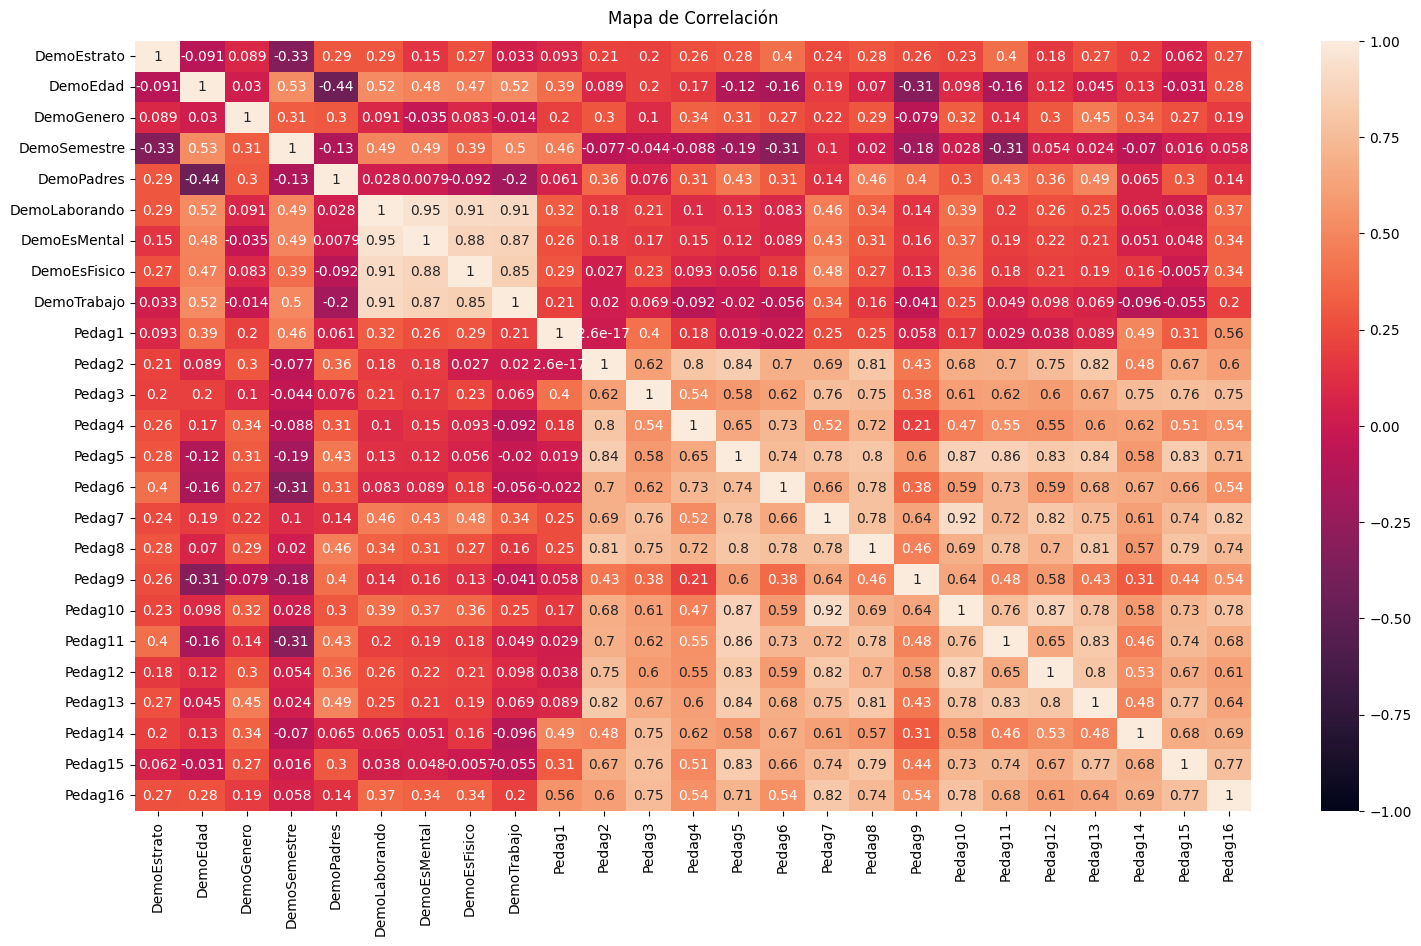

In [33]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [34]:
import pingouin as pg

pg.cronbach_alpha(data=X_train_norm)

datosOrg = X_train_norm[list(X_train_norm.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.86

(np.float64(0.8687930100205276), array([0.824, 0.907]))

### Paso 5: Modelos Clasificacion sin y con Hiperparámetros, balanceado y sin mejores características

##### 1. Linear Discriminat Analysis: 80% train y 20% test

In [35]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = lda.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5714285714285714


In [36]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))
#https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.50      0.40      0.44         5
           2       0.20      1.00      0.33         1

    accuracy                           0.57        21
   macro avg       0.48      0.67      0.48        21
weighted avg       0.66      0.57      0.60        21



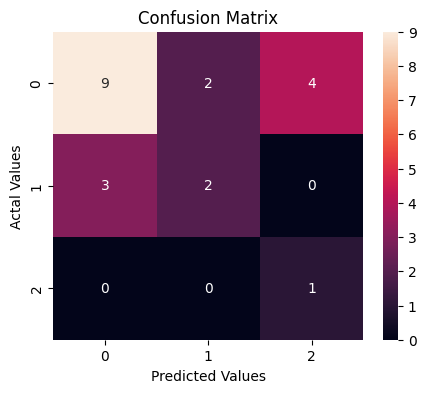

In [37]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()           

#### 1.1. Hiperparámetros LDA

In [38]:
# Crear el modelo
ldaHiper = LinearDiscriminantAnalysis()

# Definir el grid de hiperparámetros
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 1.0],  # shrinkage solo aplica para 'lsqr' y 'eigen'
    'n_components': [1, 2],  # Número de componentes
    'store_covariance': [True, False],
    'tol': [0.0001, 0.001, 0.01]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(ldaHiper , param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_lda = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_lda.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'n_components': 1, 'shrinkage': 0.5, 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}
Accuracy: 0.8095238095238095


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.80      0.80      0.80         5
           2       0.33      1.00      0.50         1

    accuracy                           0.81        21
   macro avg       0.69      0.87      0.72        21
weighted avg       0.87      0.81      0.83        21



#### 2. Maquina de Soporte Vectorial SIN HIPERPARÁMETROS

Accuracy: 0.8095238095238095


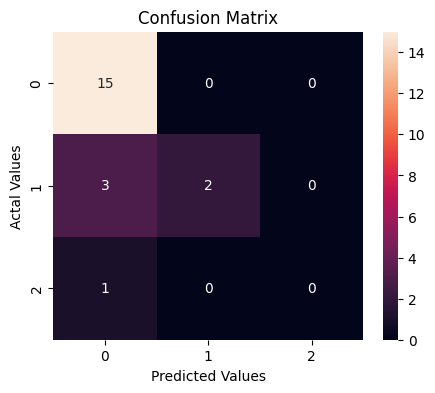

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Crear y entrenar el modelo
svc = SVC()
svc.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = svc.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()       

In [42]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21



#### 2.1. Maquina de Soporte Vectorial CON HIPERPARÁMETROS

In [43]:
# Crear el modelo
svc = SVC()

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # relevante solo para el kernel 'poly'
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_svc = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_svc.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.7619047619047619


In [44]:
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         1

    accuracy                           0.76        21
   macro avg       0.48      0.44      0.45        21
weighted avg       0.71      0.76      0.73        21



### 3. Regresión Logistica Multinomial sin hiperparámetros

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8095238095238095


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21



### 3.1. Regresión Logistica Multinomial con hiperparámetros

In [47]:
# Crear el modelo
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l2', 'none'],  # 'none' solo está disponible para ciertos solvers
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_logreg = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_logreg.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.8095238095238095


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21



### 4. Naive Bayes sin hiperparámetros

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
gnb = GaussianNB()
gnb.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = gnb.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5714285714285714


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       1.00      0.20      0.33         5
           2       0.17      1.00      0.29         1

    accuracy                           0.57        21
   macro avg       0.63      0.62      0.44        21
weighted avg       0.76      0.57      0.59        21



### 4.1. Naive Bayes con hiperparámetros

In [51]:
# Crear el modelo
gnb = GaussianNB()

# Definir el grid de hiperparámetros
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(gnb, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_gnb = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gnb.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'var_smoothing': np.float64(1.0)}
Accuracy: 0.7619047619047619


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         1

    accuracy                           0.76        21
   macro avg       0.55      0.53      0.54        21
weighted avg       0.80      0.76      0.78        21



### 5. Random Forest sin hiperparámetros

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
rf = RandomForestClassifier()
rf.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8095238095238095


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21



### 5.1. Random Forest con hiperparámetros

In [55]:
# Crear el modelo
rf = RandomForestClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8095238095238095


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21



### 6. XGBoost sin hiperparámetros

In [57]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8571428571428571


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.61      0.53      0.55        21
weighted avg       0.83      0.86      0.83        21



### 6.1.  XGBoost con hiperparámetros

In [63]:
# Crear el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8095238095238095


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21



### 7.  GBM sin hiperparámetros

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo
gbm = GradientBoostingClassifier()
gbm.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = gbm.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7619047619047619


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         1

    accuracy                           0.76        21
   macro avg       0.48      0.44      0.45        21
weighted avg       0.71      0.76      0.73        21



### 7.1.  GBM con hiperparámetros

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score

# Crear el modelo
gbm = GradientBoostingClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_gbm = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gbm.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.8095238095238095


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21



### 8. Redes Neuronales sin hiperparámetros

In [69]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_norm, y_train)

# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8095238095238095


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.52      0.51      0.51        21
weighted avg       0.77      0.81      0.78        21



### 8.1. Redes Neuronales con hiperparámetros

In [71]:
# Crear el modelo
mlp = MLPClassifier(random_state=42, early_stopping=True)

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm, y_train)

# Mejor modelo
best_mlp = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_mlp.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.8095238095238095


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         1

    accuracy                           0.81        21
   macro avg       0.60      0.47      0.48        21
weighted avg       0.80      0.81      0.77        21

